In [1]:
!pip install --upgrade gensim -q
!pip install matplotlib -q

In [2]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import string

In [3]:
gensim.__version__

'4.3.2'

In [4]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [5]:
wv = api.load('glove-wiki-gigaword-300')

In [ ]:
wv.most_similar(positive=['seo', 'services'], topn=100)

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import requests
from xml.etree import ElementTree as ET
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string

#Fetch sitemap XML from URL
url = 'https://igeneratedigital.com.au/sitemap.xml'  # Replace this with the actual URL
response = requests.get(url)
sitemap_xml = response.text

# Parse XML to get a list of pages
root = ET.fromstring(sitemap_xml)
pages = [url.find('{http://www.sitemaps.org/schemas/sitemap/0.9}loc').text.split('/')[-1] for url in root.findall('./url')]


# Fetch most similar words
most_similar_words = wv.most_similar(positive=['seo', 'services'], topn=100)

# Separate the words and their vectors
words = [word for word, _ in most_similar_words]
vectors = [wv[word] for word, _ in most_similar_words]

# Preprocess the data to extract plotting variables
keywords = [d['keyword'] for d in data]
pages = [d['page'] for d in data]
navbars = [d['navbar'] for d in data]
topic_distances = [d['topic_distance'] for d in data]

# Convert categorical variables to numerical indices for plotting
unique_pages = list(set(pages))
unique_navbars = list(set(navbars))
pages_idx = [unique_pages.index(page) for page in pages]
navbars_idx = [unique_navbars.index(navbar) for navbar in navbars]

# Create a 3D scatter plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(navbars_idx, pages_idx, topic_distances, c=topic_distances, cmap='viridis')

# Label the points
for i, keyword in enumerate(keywords):
    ax.text(navbars_idx[i], pages_idx[i], topic_distances[i], keyword)

# Show axis labels and set ticks
ax.set_xlabel('Navbar')
ax.set_ylabel('Page')
ax.set_zlabel('Topic Distance')
ax.set_xticks(range(len(unique_navbars)))
ax.set_xticklabels(unique_navbars)
ax.set_yticks(range(len(unique_pages)))
ax.set_yticklabels(unique_pages)

# Show color bar
plt.colorbar(sc)

plt.show()


NameError: name 'data' is not defined

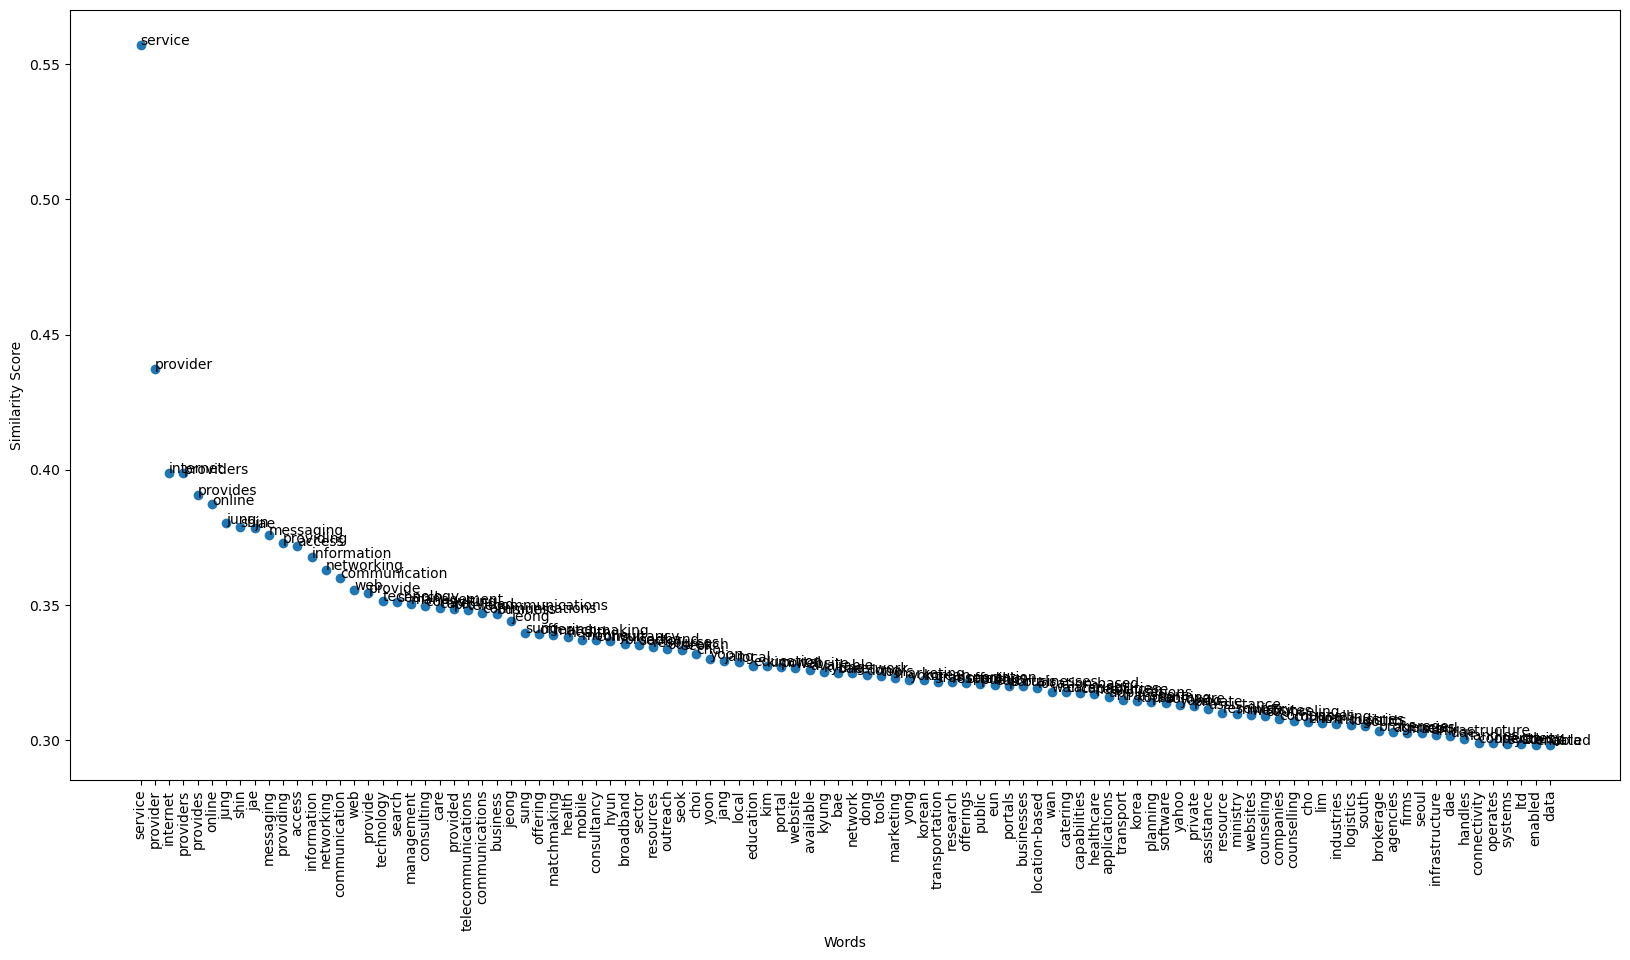

In [26]:
most_similar_words = wv.most_similar(positive=['seo', 'services'], topn=100)

# Separate the words and similarity scores
words = [word for word, _ in most_similar_words]
scores = [score for _, score in most_similar_words]

# Create the scatter plot
plt.figure(figsize=(20, 10))
plt.scatter(words, scores)
plt.xlabel('Words')
plt.ylabel('Similarity Score')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Annotate each point with the word it represents
for i, word in enumerate(words):
    plt.annotate(word, (words[i], scores[i]))

plt.show()

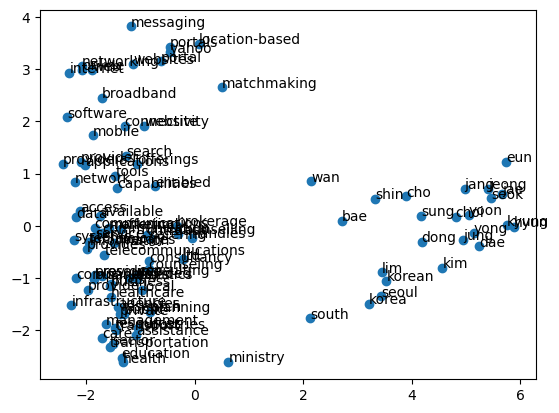

In [27]:
# Fetch the most similar words and their similarity scores
most_similar_words = wv.most_similar(positive=['seo', 'services'], topn=100)

# Extract the words from the tuples
words = [word for word, _ in most_similar_words]

# Get the word vectors for these words
sample_vectors = np.array([wv[word] for word in words])

# Initialize and apply PCA
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)

# Now, 'result' contains the 2D coordinates of each word vector
# You can plot these if you like
plt.scatter(result[:, 0], result[:, 1])

# Annotate each point with the word it represents
for i, word in enumerate(words):
    plt.annotate(word, (result[i, 0], result[i, 1]))

plt.show()

In [4]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


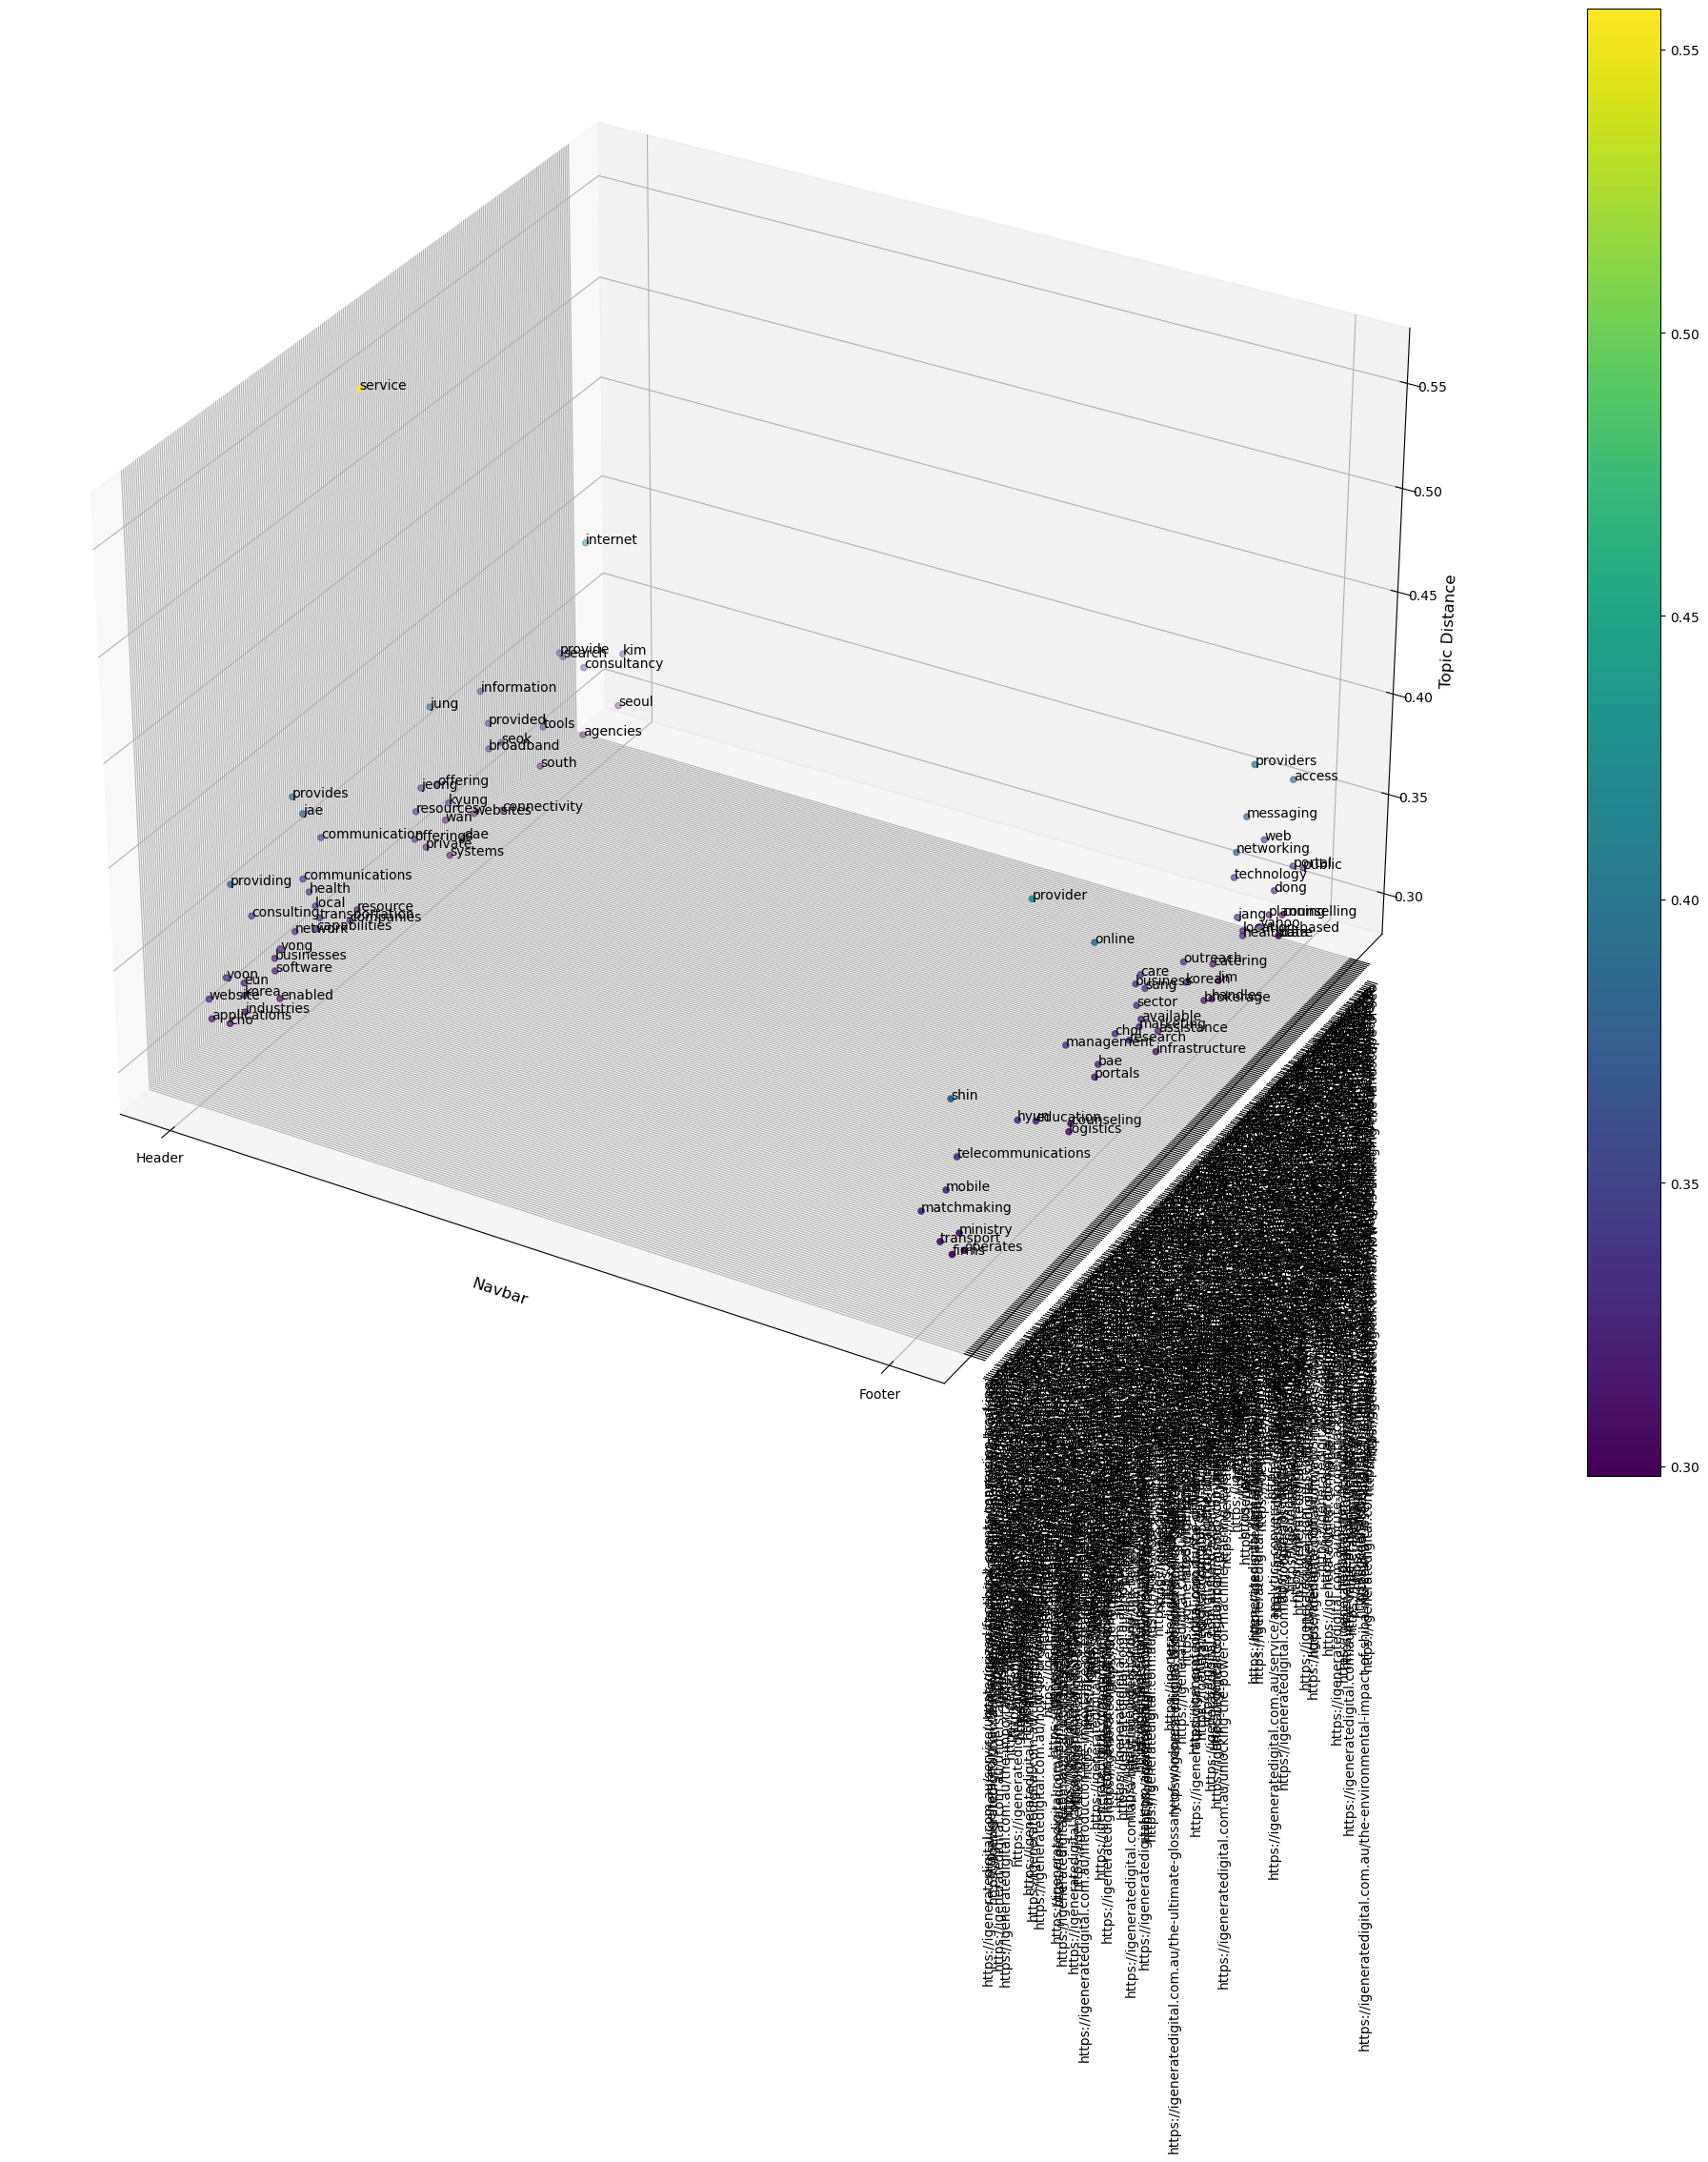

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import requests
from xml.etree import ElementTree as ET
import random


# Fetch sitemap XML from URL
url = 'https://igeneratedigital.com.au/sitemap.xml'  # Replace this with the actual URL
response = requests.get(url)
sitemap_xml = response.text

# Parse XML to get a list of pages
root = ET.fromstring(sitemap_xml.strip())
namespace = {'ns': 'http://www.sitemaps.org/schemas/sitemap/0.9'}  # Define the XML namespace
sitemap_pages = [url.find('ns:loc', namespace).text for url in root.findall('./ns:url', namespace)]

# Assume wv.most_similar generates similar words (replace with actual function call)
most_similar_words = wv.most_similar(positive=['seo', 'services'], topn=100)


# Create data list from most similar words
# Randomly associate each similar word with a page from the sitemap and a navbar
data = []
for i, (word, score) in enumerate(most_similar_words):
    navbar_type = 'Header' if i % 2 == 0 else 'Footer'
    random_page = random.choice(sitemap_pages)  # Randomly select a page from the sitemap
    data.append({'keyword': word, 'page': random_page, 'navbar': navbar_type, 'topic_distance': score})


# Preprocess the data
keywords = [d['keyword'] for d in data]
pages = [d['page'] for d in data]
navbars = [d['navbar'] for d in data]
topic_distances = [d['topic_distance'] for d in data]

# Convert categorical variables to numerical indices for plotting
unique_pages = list(set(sitemap_pages))  # Use sitemap pages
unique_navbars = list(set(navbars))
pages_idx = [unique_pages.index(page) if page in unique_pages else -1 for page in pages]
navbars_idx = [unique_navbars.index(navbar) for navbar in navbars]

# Create 3D scatter plot
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(navbars_idx, pages_idx, topic_distances, c=topic_distances, cmap='viridis')


# Label the points
for i, keyword in enumerate(keywords):
    ax.text(navbars_idx[i], pages_idx[i], topic_distances[i], keyword)

# Show axis labels and set ticks
ax.set_xlabel('Navbar', fontsize=12)
ax.set_ylabel('Page', fontsize=12)
ax.set_zlabel('Topic Distance', fontsize=12)
ax.set_xticks(range(len(unique_navbars)))
ax.set_xticklabels(unique_navbars, fontsize=10)

y_tick_locations = range(len(unique_pages))
ax.set_yticks(y_tick_locations)
ax.set_yticklabels(unique_pages, fontsize=10, rotation=90)

# Show color bar
plt.colorbar(sc)

plt.show()
